#### Several works in the field of automatic tumor diagnosis can be divided into two main categories, namely feature extraction and sample classification. 
#### In general, the image properties are extracted first. These features usually include static features such as entropy, skewness, mean, energy, torque, and correlation or properties obtained by applying other algorithms

to do list
1. bs parameter(consistant) try different bs 
2. test why accuracy so low?
3. train all models
4. other transfer learning model
5. structure visualization
6. result visualization and structure comparison
7. mask or unmasked? tl or cnn? which cnn? which tl? 
8. feature extraction techniques?
9. optimization?


In [96]:
import os
import random
from sklearn.model_selection import train_test_split
import shutil

# Set the paths to your three folders of different classes
class1_folder = 'newproject/data/Glioma'
class2_folder = 'newproject/data/Meningioma'
class3_folder = 'newproject/data/Pituitary'

# Set the path to the output directory for the training and testing sets
output_dir = 'newproject/data/pit'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to split a class folder into training and testing sets
def split_class_data(class_folder, output_dir):
    # Get the list of image files in the class folder
    image_files = [f for f in os.listdir(class_folder) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Shuffle the list of image files
    random.shuffle(image_files)
    
    # Calculate the number of images for testing set (20% of the total)
    num_test_images = int(0.2 * len(image_files))
    
    # Split the list into training and testing sets
    train_images, test_images = image_files[num_test_images:], image_files[:num_test_images]
    
    # Create subdirectories for training and testing sets
    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    # Copy training images to the train directory
    for image in train_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(train_dir, image)
        shutil.copy(src_path, dest_path)
    
    # Copy testing images to the test directory
    for image in test_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(test_dir, image)
        shutil.copy(src_path, dest_path)

# Split data for each class

# split_class_data(class1_folder, output_dir)
# split_class_data(class2_folder, output_dir)
split_class_data(class3_folder, output_dir)


In [2]:
from model import CNN1, CNN2, Finetuning
import yaml
from data_loader import test_generation,data_generation
from model import CNN1, CNN2, Finetuning
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd



In [3]:
import numpy as np
import keras
import tensorflow as tf
import cv2
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

import os
import cv2
import numpy as np
from skimage import io, img_as_ubyte
from kapur import kapur_threshold

from matplotlib import pyplot as plt
from skimage import io, img_as_ubyte
from kapur import kapur_threshold

from PIL import Image
from tensorflow.keras.layers import Conv2D, Input, GlobalAveragePooling2D, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model, load_model, save_model

from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend

from keras import applications
from keras.models import Sequential



In [3]:
(train_generator,validation_generator) = data_generation(augmentation=False, processed = True, masked = False, bs = 32, seed = 123)

The folder for training data is: D:\project\data\Unmasked_Processed_Training 
 Color channels: grayscale
Found 5971 images belonging to 4 classes.
Found 1052 images belonging to 4 classes.


In [4]:
bs = 32
model_path = "models/CNN1_aug/weights-01-0.74.h5"
model = CNN1((256, 256, 1))
model.build(input_shape = (bs, 256, 256, 1))
test_generator = test_generation(False, bs)
model.load_weights(model_path, skip_mismatch=False, by_name=False, options=None)
print("Weights have been loaded, now predicting...")
model.compile(optimizer= Adam(learning_rate = 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])
# model.evaluate_generator(generator = validation_generator,verbose = 1)



the test data used are stored in path: D:\project\data\Unmasked_Processed_Testing
Found 1311 images belonging to 4 classes.
Weights have been loaded, now predicting...


In [131]:
# model.save("model.tf", save_format="tf")

INFO:tensorflow:Assets written to: model.tf\assets


INFO:tensorflow:Assets written to: model.tf\assets


In [132]:
# model = tf.keras.models.load_model("model.tf")

[array([[[[ 0.13103828,  0.17051588, -0.15626875,  0.16667202,
           -0.17285915,  0.17674825, -0.24880311, -0.17812218,
           -0.21584317, -0.01770687,  0.14796236,  0.06733836,
            0.12793915, -0.06047507, -0.19862866,  0.01820555]],
 
         [[-0.01643989, -0.02561786,  0.05172613, -0.11454183,
           -0.11515906, -0.13097651,  0.01259891, -0.14738461,
           -0.21322714, -0.08605378,  0.11179935,  0.20354255,
            0.18623148,  0.06407068, -0.29936594, -0.05619234]],
 
         [[ 0.16842493, -0.05808551,  0.13732705, -0.1834326 ,
            0.0305494 , -0.04120729,  0.01622857,  0.15655258,
            0.09958641, -0.12056718,  0.11955417,  0.1485339 ,
           -0.02121248, -0.1541873 ,  0.0078603 ,  0.07640173]]],
 
 
        [[[-0.10622627,  0.13819848, -0.02456945,  0.01932443,
           -0.19038251,  0.17269045, -0.02285892,  0.02552251,
            0.18081358, -0.14878042, -0.02792243, -0.13844258,
            0.24036689, -0.2573476 , -0.

In [39]:
predictions = model.predict(test_generator,
                                steps=test_generator.samples/bs,
                                workers = 0,
                                verbose=1)


40/40 [==============================] - 35s 857ms/step


In [1]:
image

NameError: name 'image' is not defined

In [95]:
import tensorflow as tf
image = tf.image.resize(image, (512, 512))

In [100]:
image = Image.fromarray(image)
image

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute '__array_interface__'

In [99]:
Image(img)

TypeError: 'module' object is not callable

In [97]:
image.shape

TensorShape([512, 512, 3])

In [5]:
# confusion_matrix(
#     y_true=trueClass, # ground truth (correct) target values
#     y_pred=predictedClass)

In [44]:
# # Evaluate predictions, first get the predicted labels and the true labels
predictedClass = np.argmax(predictions, axis=1)
trueClass = test_generator.classes[test_generator.index_array]
classLabels = list(test_generator.class_indices.keys())

# Create confusion matrix
confusionMatrix = confusion_matrix(
    y_true=trueClass, # ground truth (correct) target values
    y_pred=predictedClass) # estimated targets as returned by a classifier
confusionMatrix = pd.DataFrame(confusionMatrix, columns = classLabels, index = classLabels)

accuracy = accuracy_score(trueClass, predictedClass)
print("The confusion Matrix on testing set for model is: \n", confusionMatrix)
print("\nAccuracy is %f"%accuracy)

The confusion Matrix on testing set for model is: 
             glioma  meningioma  notumor  pituitary
glioma         295           5        0          0
meningioma     163         138        5          0
notumor        109         235       61          0
pituitary      287          13        0          0

Accuracy is 0.376812


In [19]:
accuracy = accuracy_score(trueClass, predictedClass)
print("\nAccuracy is %f"%accuracy)


Accuracy is 0.376812


In [291]:
import yaml
with open("config.yml") as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)

In [278]:
from importlib.metadata import version


In [289]:
packlist = ["PyYAML","pandas","scikit-learn","tensorflow","keras","pillow","opencv-python"]
for x in packlist:
    print(x, "=", version(x))

PyYAML = 6.0
pandas = 1.4.2
scikit-learn = 1.0.2
tensorflow = 2.9.1
keras = 2.9.0
pillow = 9.0.1
opencv-python = 4.8.0.74


In [31]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from PIL import Image
import keras
from tensorflow.keras.layers import Conv2D, Input, GlobalAveragePooling2D, GlobalMaxPooling2D, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model, load_model, save_model

from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend

from keras import applications
from keras.models import Sequential

import numpy as np

In [210]:
import os
from glob import glob
from tqdm.notebook import tqdm
import pickle


import cv2
import numpy as np
import matplotlib.pyplot as plt


import sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import utils 
import tensorflow as tf

## feature extractors
from SimpleITK import GetImageFromArray
from radiomics import glrlm, glcm, gldm

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

Error loading C extensions
Traceback (most recent call last):
  File "D:\applications\anaconda3\lib\site-packages\radiomics\__init__.py", line 286, in <module>
    from radiomics import _cmatrices as cMatrices  # noqa: F401
ImportError: numpy.core.multiarray failed to import


ImportError: numpy.core.multiarray failed to import

In [88]:
from preprocessing import blur_and_crop
import cv2
from PIL import Image
import os
mydir = "data/Predict/"
mydir = "data/Unmasked_Processed_Training/glioma/"
results = []
i = 0
for f in os.listdir(mydir):
    img = cv2.imread(mydir + f)
    img = blur_and_crop(img, "gaussian", cropping= False, kernel = 3, masking = False, plot=False)
    img = img/255
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0 )
    res = model.predict(img, verbose = False)
    i += 1
    print(np.argmax(res))
    if i >=100:
        break
    results.append(np.argmax(res))
#     print(np.argmax(res))
#     break
#     transform.resize(np_image, (512, 512, 1))
    



#     image = Image.fromarray(new_img)
#     x = np.expand_dims(img, axis=0)
#     np_image = np.array(np_image).astype('float32')/255
#     np_image = transform.resize(np_image, (512, 512, 1))
#     np_image = np.expand_dims(np_image, axis=0)
#     model.predict(img)
#     print("Image: %s, Predicted Class:%s with probability%s"%())

1
2
1
1
1
1
1
1
0
1
3
1
0
1
1
2
2
1
1
1
2
1
1
1
1
1
2
1
1
1
0
1
0
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
0
1
1
2
1
1
2
1
2
2
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
2
0
1
1
0
2
1
1
1
0
1
1
1
1
1
1
2
1
1
2


In [86]:
results

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [82]:
results

[1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,


In [80]:
for x in res2:
    if x!=1 and x!=2:
        print(x)

In [64]:
imgori = cv2.imread(mydir + f)

imgori = blur_and_crop(imgori, "median", cropping= False, kernel = 5, masking = False, plot=False)
img = imgori/255
img = np.expand_dims(img, axis=-1)
# img = img*255
# img = np.asarray(img, dtype = 'int')

In [69]:
img[0][0][0]

0.00392156862745098

In [63]:
for x in (img == imgori):
    for z in x:
        if z==False:
            print(z)

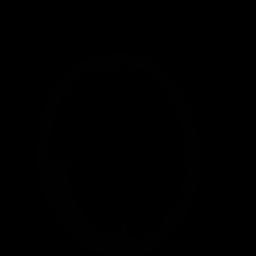

In [59]:
image = Image.fromarray(img)
image

In [29]:
img = cv2.imread(mydir + f)
img = img/255
img = img*255
img.shape
image = Image.fromarray(img)
image

TypeError: Cannot handle this data type: (1, 1, 3), <f8

In [45]:
img = cv2.imread(mydir + f)
img[0][0]
img.shape

(256, 256, 3)

In [40]:
img = cv2.imread(mydir + f)
img = img/255
img = img*255
for x in img:

In [43]:
img[0][0]

array([1., 1., 1.])

In [106]:
path = "data/Predict/Te-gl_0011.jpg"

(512, 512, 3)


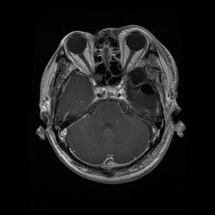

In [109]:
img = cv2.imread(path)
dim = (215, 215)
print(img.shape)
resized = cv2.resize(img, dim)
resized = Image.fromarray(resized)
resized

In [97]:
    


# original_path = os.path.join(current_directory, training_path)
shapes = []
original_path = "newproject/data/training"
for subf in os.listdir(original_path):
    for f in os.listdir(os.path.join(original_path, subf)):
        image_path = os.path.join(original_path, subf, f)
        img = cv2.imread(image_path)
        shapes.append(img.shape)

In [99]:
nested_list = [
    [10, 5, 7],
    [2, 8, 6],
    [3, 1, 9]
]

# Find the smallest number for each position
smallest_numbers = [max(column) for column in zip(*shapes)]
smallest_numbers

[512, 512, 3]

In [81]:
mydir + f

'data/Predict/Te-no_0014.jpg'

In [79]:
image.save(mydir + f)

In [60]:
img.shape

(249, 205)

In [48]:
blur_and_crop(img, "median", cropping= False, kernel = 5, masking = False, plot=False)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [36]:
cfg = vgg19_model.get_config()

In [38]:
cfg['layers'][0]

{'class_name': 'InputLayer',
 'config': {'batch_input_shape': (None, 512, 512, 3),
  'dtype': 'float32',
  'sparse': False,
  'ragged': False,
  'name': 'input_5'},
 'name': 'input_5',
 'inbound_nodes': []}

In [40]:


# Create new model with modified config which accepts the input shape: [input_size, input_size, 1]
cfg = vgg19_model.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 512, 512, 1)
model = Model.from_config(cfg)

(None, 512, 512, 1)

In [29]:
np.reshape(base_model.layers[1].get_weights()[0].sum(axis =2), (3,3,1,64)).shape

(3, 3, 1, 64)

In [11]:
# for i, layer in enumerate(base_model.layers):
#     print(i, layer.get_weights().shape())


AttributeError: 'list' object has no attribute 'shape'

In [79]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19

class FineTunedVGG19(tf.keras.Model):
    def __init__(self, num_classes):
        super(FineTunedVGG19, self).__init__()

        # Load the VGG19 model with pretrained weights and exclude the top (classification) layers
        self.vgg19 = VGG19(weights='imagenet', include_top=False)

        # Set all layers in VGG19 as non-trainable
        for layer in self.vgg19.layers:
            layer.trainable = False

        # Modify the input layer to match the desired input shape (512, 512, 1)
        self.input_layer = tf.keras.layers.Input(shape=(512, 512, 1))

        # Sum up weights along the second dimension of the first convolutional layer
        first_conv_layer = self.vgg19.layers[1]
        weights_sum = tf.reduce_sum(first_conv_layer.weights[0], axis=2, keepdims=True)
        updated_weights = [weights_sum, first_conv_layer.weights[1]]
        self.custom_first_conv = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation='relu',
            padding='same',
            kernel_initializer=tf.keras.initializers.Constant(updated_weights)
        )

        # Add your custom layers for fine-tuning
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(512, activation='relu')
        self.dense2 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.custom_first_conv(inputs)  # Use the custom first convolutional layer
        x = self.vgg19(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x

# Example usage
num_classes = 10  # Replace with the number of classes in your specific problem
model = FineTunedVGG19(num_classes)


In [94]:
custom_weights = [
    # Weights matrix
    tf.constant([[0.1] * 784] * 128, dtype=tf.float32),  # Example weights (arbitrary)
    # Bias vector
    tf.constant([0.0] * 128, dtype=tf.float32)  # Example bias (arbitrary)
]
custom_weights[0].shape


TensorShape([128, 784])

In [102]:
# Example usage
model = CustomModel()
model.dense4.get_weights()

AttributeError: 'CustomModel' object has no attribute 'dense4'

In [78]:
base_model = applications.VGG19(weights='imagenet', 
                                        include_top=False, 
                                        input_shape=(512,512, 3))
tl_model = Sequential()
tl_model.add(base_model)
type(tl_model)


keras.engine.sequential.Sequential

In [ ]:
base_model = applications.VGG19(weights='imagenet', 
                                        include_top=False, 
                                        input_shape=(512,512, 3))

    # elif transfer == "inceptionv3":

    #     self.base_model = applications.InceptionV3(weights='imagenet', 
    #                                     include_top=False, 
    #                                     input_shape = (512,512, 3))
        



    ## add a global average pooling layer to flatten out, then apply drop out and dense layers to fine-tune on our MRI datasets
pooling1 = GlobalAveragePooling2D()
dropout1 = Dropout(rate=0.5)    
dense2 = Dense(256,activation='relu') 
dropout2 = Dropout(rate=0.5)   
dense3 = Dense(4,activation='softmax')    
x = self.base_model(inputs)
x = self.dropout1(self.pooling1(x))
x = self.dropout2(self.dense2(x))
output = self.dense3(x)
vgg19_model = Model(self.base_model.input, output)
## make the parameters in the inceptionv3 model untrainable
cfg = vgg19_model.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 512, 512, 1)
self.model = Model.from_config(cfg)

# Set the model weights to that of the pretrained VGG19
# and freeze all layers except the final Dense layers.
for i, layer in enumerate(self.model.layers):
    if i == 1:
        new_weights = np.reshape(self.model.layers[i].get_weights()[0].sum(axis=2),(3,3,1,64))
        self.model.set_weights([new_weights])
        layer.trainable = False
    elif len(self.model.layers) - i > 1: # Freeze all but last 3 layers
        layer.trainable = False
        layer.set_weights(self.model.layers[i].get_weights())
    else:
        layer.trainable = True 
            layer.set_weights(self.model.layers[i].get_weights())

    # ## add a conv layer before the inceptionv3 to make the number of input channels in agreement
    # self.conv1 = Conv2D(3,kernel_size=(1,1),input_shape=input_shape)


In [56]:
class Finetuning(tf.keras.Model):
  def __init__(self, transfer):
    super().__init__()

    if transfer == "VGG19":

        self.base_model = applications.VGG19(weights='imagenet', 
                                        include_top=False, 
                                        input_shape=(512,512, 3))

    # elif transfer == "inceptionv3":

    #     self.base_model = applications.InceptionV3(weights='imagenet', 
    #                                     include_top=False, 
    #                                     input_shape = (512,512, 3))
        



    ## add a global average pooling layer to flatten out, then apply drop out and dense layers to fine-tune on our MRI datasets
    self.pooling1 = GlobalAveragePooling2D()
    self.dropout1 = Dropout(rate=0.5)    
    self.dense2 = Dense(256,activation='relu') 
    self.dropout2 = Dropout(rate=0.5)   
    self.dense3 = Dense(4,activation='softmax')    
 
  def call(self, inputs):

    x = self.base_model(inputs)
    x = self.dropout1(self.pooling1(x))
    x = self.dropout2(self.dense2(x))
    output = self.dense3(x)
#     vgg19_model = Model(self.base_model.input, output)
#     ## make the parameters in the inceptionv3 model untrainable
#     cfg = vgg19_model.get_config()
#     cfg['layers'][0]['config']['batch_input_shape'] = (None, 512, 512, 1)
#     self.model = Model.from_config(cfg)

#     # Set the model weights to that of the pretrained VGG19
#     # and freeze all layers except the final Dense layers.
#     for i, layer in enumerate(self.model.layers):
#         if i == 1:
#             new_weights = np.reshape(self.model.layers[i].get_weights()[0].sum(axis=2),(3,3,1,64))
#             self.model.set_weights([new_weights])
#             layer.trainable = False
#         elif len(self.model.layers) - i > 1: # Freeze all but last 3 layers
#             layer.trainable = False
#             layer.set_weights(self.model.layers[i].get_weights())
#         else:
#             layer.trainable = True 
#             layer.set_weights(self.model.layers[i].get_weights())

    # ## add a conv layer before the inceptionv3 to make the number of input channels in agreement
    # self.conv1 = Conv2D(3,kernel_size=(1,1),input_shape=input_shape)
#     print(vgg19_model.summary())
    return(output)

In [193]:
incept = applications.InceptionV3(weights='imagenet', include_top=False, input_shape =(512, 512, 3))

In [198]:
incept.get_weights()[0].shape

(3, 3, 3, 32)

In [185]:
class FineTunedVGG19(tf.keras.Model):
    def __init__(self, num_classes):
        super(FineTunedVGG19, self).__init__()
        
        # Load the VGG19 model with pretrained weights and exclude the top (classification) layers
        self.vgg19 = VGG19(weights='imagenet', include_top=False, input_shape =(512, 512, 3))
        
        # Set all layers in VGG19 as non-trainable
        for layer in self.vgg19.layers:
            layer.trainable = False
        
        # Add your custom layers for fine-tuning
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(512, activation='relu')
        self.dense2 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
        cfg = self.vgg19.get_config()
        cfg['layers'][0]['config']['batch_input_shape'] = (None, 512, 512, 1)
        self.vgg19 = Model.from_config(cfg)
        new_weights = np.reshape(model.vgg19.get_weights()[0].sum(axis=2),(3,3,1,64))
        weights = self.vgg19.get_weights()
        weights[0] = new_weights
        self.vgg19.set_weights(weights)
        
    def call(self, inputs):
        x = self.vgg19(inputs)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x

# Example usage
num_classes = 10  # Replace with the number of classes in your specific problem
model = FineTunedVGG19(num_classes)

In [205]:
model.vgg19.get_weights()[0].sum(axis = 1)

array([[[-0.20162125, -0.12033382,  0.06039131,  0.12090172,
         -0.00476503,  0.14399451,  0.0564025 ,  0.06487533,
          0.04152399,  0.02224388,  0.0382059 ,  0.01280329,
          0.0420663 ,  0.01550023,  0.25504804, -0.0751267 ,
          0.00799306, -0.01786176, -0.12088808,  0.04687931,
         -0.10197926, -0.02369138, -0.06042704,  0.02227663,
          0.02263776,  0.02849782,  0.06067649, -0.04369041,
          0.01719596, -0.09448141, -0.10061271, -0.13774344,
          0.01522182,  0.05472525, -0.17465907,  0.1239773 ,
         -0.10047453, -0.03885612,  0.05800623,  0.05392632,
          0.1251576 ,  0.07144002, -0.12546973,  0.05370119,
         -0.08528975, -0.12821409, -0.00477982,  0.06900681,
          0.23777427, -0.05318511,  0.04989944,  0.03536782,
         -0.20456862, -0.03304592,  0.00687038, -0.1243659 ,
          0.03152453, -0.19555567, -0.01415572,  0.02546667,
         -0.22267276, -0.03427406, -0.03702278,  0.10760158]],

       [[-0.02804927,

In [171]:

model.vgg19.get_weights()
print(model.vgg19.get_weights()[0].shape)
cfg = model.vgg19.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 512, 512, 1)
model.vgg19 = Model.from_config(cfg)
new_weights = np.reshape(model.vgg19.get_weights()[0].sum(axis=2),(3,3,1,64))
weights = model.vgg19.get_weights()
weights[0] = new_weights
model.vgg19.set_weights(weights)

(3, 3, 3, 64)


In [182]:
model.build(input_shape = (32, 512, 512, 1))

In [184]:
model.vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 512, 512, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      640       
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

(3, 3, 3, 64)

In [159]:
model.vgg19.set_weights

TypeError: 'Functional' object is not subscriptable

In [108]:


for i, layer in enumerate(model.layers):
    if i == 1:
        new_weights = np.reshape(self.model.layers[i].get_weights()[0].sum(axis=2),(3,3,1,64))
        self.model.set_weights([new_weights])
        layer.trainable = False
    elif len(self.model.layers) - i > 1: # Freeze all but last 3 layers
        layer.trainable = False
        layer.set_weights(self.model.layers[i].get_weights())
    else:
        layer.trainable = True 
        layer.set_weights(self.model.layers[i].get_weights())

NameError: name 'self' is not defined

In [74]:
cfg = model.layers[0].get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 512, 512, 1)
self.model = Model.from_config(cfg)

[]

In [48]:
cfg = vgg19_model.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 512, 512, 1)
self.model = Model.from_config(cfg)

# Set the model weights to that of the pretrained VGG19
# and freeze all layers except the final Dense layers.
for i, layer in enumerate(self.model.layers):
    if i == 1:
        new_weights = np.reshape(self.model.layers[i].get_weights()[0].sum(axis=2),(3,3,1,64))
        self.model.set_weights([new_weights])
        layer.trainable = False
    elif len(self.model.layers) - i > 1: # Freeze all but last 3 layers
        layer.trainable = False
        layer.set_weights(self.model.layers[i].get_weights())
    else:
        layer.trainable = True 
        layer.set_weights(self.model.layers[i].get_weights())

__main__.Finetuning

In [46]:
cfg = model.get_config()
cfg['layers'][0]['config']['batch_input_shape'] 

KeyError: 'layers'

### 0. Data Augmentation

In [9]:
def create_dir(newdir, empty = True):
    """
    create new folder if the target folder doesnt exist
    """
    CHECK_FOLDER = os.path.isdir(newdir)
    # If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(newdir)
        print("created folder : ", newdir)

    else:
        if empty == True:
            ## whether to remove all contents in the current augmented data folder and generate new ones
            shutil.rmtree(newdir)
            print("current augmented data removed")
            os.makedirs(newdir)
            
        print(newdir, "folder already exists.")
    
## save the augmented data and the original ones in new folders
def data_augmentation(refresh = True, num = 5):
    """refresh: whether to replace current augmented data and generate new ones
    num: number of augmented data per image"""

    
    training_path = "data\\Training"
    ## destination parent folder for augmented data
    augmented_path = "data\\augmentation_training"
    current_directory = os.getcwd()
    original_path = os.path.join(current_directory,training_path)
    augmented_path = os.path.join(current_directory,augmented_path)

    ## augmented data generator
    image_generator = ImageDataGenerator(rotation_range = 90, shear_range = 0.4,zoom_range = 0, samplewise_center=True, 
                                         vertical_flip = True, horizontal_flip = True, samplewise_std_normalization= True)
    for subf in  os.listdir(original_path):
        
        new_dir = os.path.join(augmented_path, subf)
        create_dir(new_dir, empty = refresh)
        for f in os.listdir(os.path.join(original_path, subf)):
            image_path = os.path.join(original_path, subf,f)
            img = load_img(image_path)  
            i = 1
            img.save(os.path.join(augmented_path, subf, f))
            for batch in image_generator.flow(x, batch_size = 1, 
                          save_to_dir = new_dir,  
                          save_prefix = f.split(".")[0], save_format ='jpg'):
                i += 1
                if i > num: 
                    break

In [204]:
data_augmentation()

current augmented data removed
D:\project\data\augmentation_training\notumor folder already exists.
created folder :  D:\project\data\augmentation_training\pituitary


### 1. Image Preprocessing

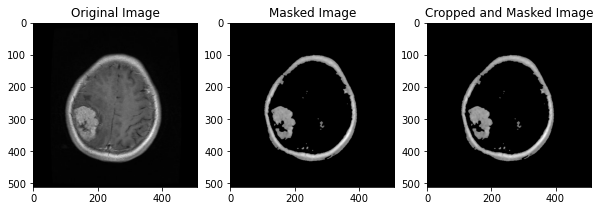

In [17]:

import imutils
def blur_and_crop(image, blur = "median", cropping= False, kernel = 5, masking = True, plot=False):
    """
    preprocessing:
    1. convert to grayscale and blur the image using median or gaussian filter
    2. (optional)apply kapur thresholding to create a mask, mask the blurred image
    3. crop the image to contain only the brain image, leaving the blank around surrounding the brain out.
    """
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if blur == "median":
        blurred = cv2.medianBlur(gray, kernel)
    elif blur == "gaussian":
        blurred = cv2.GaussianBlur(gray, (kernel, kernel), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise

    if masking == True:
   ## creating mask with kapur thresholding
        threshold = kapur_threshold(blurred)
        binr = cv2.threshold(blurred, threshold, 255, cv2.THRESH_BINARY)[1]
        masked_image = cv2.bitwise_and(blurred, blurred, mask=binr)
    else:
        masked_image = blurred
    if cropping == True:

        thresh = cv2.threshold(masked_image, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # Find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)


        # Find the extreme points for cropping
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        # crop new image out of the original image using the four extreme points (left, right, top, bottom)
        cropped_image = masked_image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]      
    else:
        cropped_image = masked_image

    if plot:
        plt.figure(figsize=(10, 10))
        plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
        plt.subplot(132), plt.imshow(masked_image, cmap='gray'), plt.title('Masked Image')
        plt.subplot(133), plt.imshow(cropped_image, cmap='gray'), plt.title('Cropped and Masked Image')
        
        plt.show()
    

    return cropped_image

img = cv2.imread(r"D:\project\data\Training\meningioma\Tr-me_0011.jpg")
new_img = blur_and_crop(img, blur = "median", cropping = False, kernel = 5, masking = True, plot=True)


In [17]:
training_path = "data\\Training"
"\\augmentation_".join(training_path.split("\\"))

'data\\augmentation_Training'

In [18]:
def preprocessing(training_path, masking = False, crop = False):
    """
    preprocess the images in training_path parent folder
    1. create a destination folder for preprocessed images
    2. blur, mask and (crop) the iamges, masking is optional.
    3. store the processed images in new folder
    
    parameter: 
    training_path: the folder name for the original images to be processed
    masking: if masking is applied in the processing
    """
    
    current_directory = os.getcwd()
    ## destination parent folder for processed data
    if masking == True:
        processed_path = "\\Processed_".join(training_path.split("\\"))
    else:
        processed_path = "\\Unmasked_Processed_".join(training_path.split("\\"))        
    
    processed_path = os.path.join(current_directory, processed_path)
    original_path = os.path.join(current_directory, training_path)
    for subf in os.listdir(original_path):
        new_dir = os.path.join(processed_path, subf)
        create_dir(new_dir, empty = True)
        for f in os.listdir(os.path.join(original_path, subf)):
            image_path = os.path.join(original_path, subf, f)
            img = cv2.imread(image_path)
            ## apply image transformation
            new_img = blur_and_crop(img, blur = "median", cropping = crop, kernel = 5, masking = masking, plot=False)
            image = Image.fromarray(new_img)
            image.save(os.path.join(new_dir, f))
        

In [19]:
## preprocess the training data,
preprocessing(training_path = "data\\Training", masking = False)
preprocessing(training_path = "data\\Training", masking = True)

current augmented data removed
D:\project\data\Unmasked_Processed_Training\glioma folder already exists.
current augmented data removed
D:\project\data\Unmasked_Processed_Training\meningioma folder already exists.
current augmented data removed
D:\project\data\Unmasked_Processed_Training\notumor folder already exists.
current augmented data removed
D:\project\data\Unmasked_Processed_Training\pituitary folder already exists.


In [20]:
## preprocessing the testing data, masked and unmasked
preprocessing(training_path = "data\\Testing", masking = True)
preprocessing(training_path = "data\\Testing", masking = False)

current augmented data removed
D:\project\data\Processed_Testing\glioma folder already exists.
current augmented data removed
D:\project\data\Processed_Testing\meningioma folder already exists.
current augmented data removed
D:\project\data\Processed_Testing\notumor folder already exists.
current augmented data removed
D:\project\data\Processed_Testing\pituitary folder already exists.
current augmented data removed
D:\project\data\Unmasked_Processed_Testing\glioma folder already exists.
current augmented data removed
D:\project\data\Unmasked_Processed_Testing\meningioma folder already exists.
current augmented data removed
D:\project\data\Unmasked_Processed_Testing\notumor folder already exists.
current augmented data removed
D:\project\data\Unmasked_Processed_Testing\pituitary folder already exists.


### 2. DataFlow

In [21]:
def data_generation(augmentation,  processed = True, masked = False):
    """
    input parameters 
    

    1. augmentation: bool, if data augmentation is implemented during data generation
    2. processed: If th processed or original imgages are used for training. 
    3. masked: bool, if the images were masked using Kapur thresholding. When True, the data generator would read the
    images from masked folder instead of the unmasked ones
    
    
    """
    current_directory = os.getcwd()
    
    masked_ind = ""
    if masked == False:
        masked_ind = "Unmasked_"
    if processed == True:
        processed_path = os.path.join(current_directory, "data", masked_ind + "Processed_Training")
        color = "grayscale"
    else:
        processed_path = os.path.join(current_directory, "data", masked_ind + "Training") 
        color = 'rgb'
    classes = os.listdir(processed_path)
    print("The folder for training data is: %s"%processed_path,"\n", "Color channels: %s"%color)

    if augmentation == True:
        train_datagen = ImageDataGenerator(rescale=1./255,
            rotation_range = 90, shear_range = 0.4,zoom_range = 0, samplewise_center=True, 
            vertical_flip = True, horizontal_flip = True, 
            validation_split=0.2) # set validation split
    else:
        train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # set validation split

    train_generator = train_datagen.flow_from_directory(
        processed_path,
        target_size=(512, 512),
        color_mode=color,
        classes=classes,
        class_mode = "categorical",
        batch_size=32,
        shuffle=True,
        seed=None,
        save_to_dir=None,
        save_prefix='',
        save_format='jpg',
        follow_links=False,
        interpolation='nearest',
        keep_aspect_ratio=False,
        subset = "training"
    ) # set as training set
    validation_generator = train_datagen.flow_from_directory(
        processed_path,
        target_size=(512, 512),
        color_mode=color,
        classes=classes,
        class_mode = "categorical",
        batch_size=32,
        shuffle=True,
        seed=None,
        save_to_dir=None,
        save_prefix='',
        save_format='jpg',
        follow_links=False,
        interpolation='nearest',
        keep_aspect_ratio=False,
        subset = "validation"
    
    ) # set as validation data
    return (train_generator,validation_generator)


## 3. CNN models

### 3.1 model structure ## 1 simple CNN (Unmasked)

In this section, we construct two different CNN architectures, train them on the augmented dataset, with or without masking, and test their performances on testing dataset.

In [10]:
## generate the training and validation data for cnn models

(train_generator,validation_generator) = data_generation(augmentation=True, processed = True,
                                                        masked = False)

The folder for training data is: D:\project\data\Unmasked_Processed_Training 
 Color channels: grayscale
Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [11]:

print(validation_generator.class_indices)

x,y = next(train_generator)
print(x[0].shape)
print(y[0].shape)

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
(512, 512, 1)
(4,)


In [5]:


# checkpoint file and early stopping

def model_builder(batch_size, nb_epochs, model, model_name):
    folderpath = "models/%s/"%model_name
    CHECK_FOLDER = os.path.isdir(folderpath)
    if not CHECK_FOLDER:
        os.makedirs(folderpath)
    filepath = folderpath + "weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=2)
    callbacks_list = [checkpoint, early_stopping]
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    history = model.fit(
        train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs = nb_epochs,
        callbacks = callbacks_list)
    return (model, history)



#### cnn model structure 1

In [6]:
### define the architecture for model 1

def Build_Model(input_shape=(512,512, 1)):
    Model = keras.models.Sequential([
            Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=input_shape),
            Conv2D(32,kernel_size=(3,3),activation='relu'),
            MaxPool2D(2,2),
            Conv2D(32,kernel_size=(3,3),activation='relu'),    
            Conv2D(32,kernel_size=(3,3),activation='relu'),    
            Conv2D(64,kernel_size=(3,3),activation='relu'),
            MaxPool2D(4,4),
            Flatten() ,    
            Dense(64,activation='relu') ,        
            Dense(32,activation='relu') ,   
            Dense(16,activation='relu'),
            Dropout(rate=0.5) ,            
            Dense(4,activation='sigmoid') ,    
            ])
    return Model

In [16]:
model = Build_Model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 508, 508, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 254, 254, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 248, 248, 64)      18496     
                                                        

In [ ]:
architecture visualization
?????????????????????

In [17]:

model_name = "unmasked_cnn1"
model1, history1 = model_builder(batch_size = 32, nb_epochs = 20, model = model, model_name = model_name)

Epoch 1/20
142/142 [==============================] - ETA: 0s - loss: 1.2135 - accuracy: 0.4137 
Epoch 1: val_accuracy improved from -inf to 0.69821, saving model to models/unmasked_cnn1\weights-01-0.70.hdf5
142/142 [==============================] - 4753s 34s/step - loss: 1.2135 - accuracy: 0.4137 - val_loss: 1.0310 - val_accuracy: 0.6982
Epoch 2/20
142/142 [==============================] - ETA: 0s - loss: 0.9604 - accuracy: 0.5898
Epoch 2: val_accuracy improved from 0.69821 to 0.71875, saving model to models/unmasked_cnn1\weights-02-0.72.hdf5
142/142 [==============================] - 683s 5s/step - loss: 0.9604 - accuracy: 0.5898 - val_loss: 0.8839 - val_accuracy: 0.7188
Epoch 3/20
142/142 [==============================] - ETA: 0s - loss: 0.8543 - accuracy: 0.6462
Epoch 3: val_accuracy did not improve from 0.71875
142/142 [==============================] - 1241s 9s/step - loss: 0.8543 - accuracy: 0.6462 - val_loss: 0.9781 - val_accuracy: 0.6812
Epoch 4/20
142/142 [================

In [ ]:
### visualize the training process:
???????????????????????????

In [17]:
history1.history["val_accuracy"]

[0.5723214149475098]

In [ ]:
model1.history['accuracy']

In [316]:
### masked cnn


(train_generator,validation_generator) = data_generation(augmentation=True, processed = True,
                                                        masked = True)

model_name = "masked_cnn1"
model2, history2  = model_builder(bs = 32, epochs = 20, model = model, model_name = model_name)

C:\Users\jiazh\AppData\Local\Temp\ipykernel_4296\3607229508.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/20
142/142 [==============================] - ETA: 0s - loss: 1.1976 - accuracy: 0.4638
Epoch 1: saving model to models/model1\weights-01-0.57.hdf5
142/142 [==============================] - 701s 5s/step - loss: 1.1976 - accuracy: 0.4638 - val_loss: 1.1166 - val_accuracy: 0.5714
Epoch 2/20
142/142 [==============================] - ETA: 0s - loss: 1.0106 - accuracy: 0.5691
Epoch 2: saving model to models/model1\weights-02-0.66.hdf5
142/142 [==============================] - 708s 5s/step - loss: 1.0106 - accuracy: 0.5691 - val_loss: 0.9855 - val_accuracy: 0.6580
Epoch 3/20
142/142 [==============================] - ETA: 0s - loss: 0.8719 - accuracy: 0.6281
Epoch 3: saving model to models/model1\weights-03-0.67.hdf5
142/142 [==============================] - 716s 5s/step - loss: 0.8719 - accuracy: 0.6281 - val_loss: 0.9674 - val_accuracy: 0.6732
Epoch 4/20
142/142 [==============================] - ETA: 0s - loss: 0.8347 - accuracy: 0.6579
Epoch 4: saving model to models/model1\w

In [ ]:
## results visualization and comparison
?????????????????????

### 3.2 CNN structure ## 2

here we define a slightly different CNN structure and compare the results in secion 3.1

In [317]:
def Build_Model2(input_shape=(512,512, 1)):
    Model = keras.models.Sequential([
            Conv2D(16,kernel_size=(7,7),input_shape=input_shape),            
            MaxPool2D(2,2),
#             BatchNormalization(),
            Conv2D(32,kernel_size=(5,5)),
            MaxPool2D(2,2),
#             BatchNormalization(),
            Conv2D(64,kernel_size=(3,3)),  
            MaxPool2D(2,2),
#             BatchNormalization(),
            Conv2D(128,kernel_size=(3,3)),  
            MaxPool2D(2,2),
#             BatchNormalization(),
            GlobalAveragePooling2D(),      
            Dense(256,activation='relu') ,   
            Dense(128,activation='relu'),
            Dropout(rate=0.2) ,            
            Dense(4,activation='softmax') ,    
            ])
    return Model
model2 = Build_Model2()
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 506, 506, 16)      800       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 253, 253, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 249, 249, 32)      12832     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 61, 61, 64)     

In [22]:
##architecture visualization
?????????????????????

Object `???????????????????` not found.


In [319]:

### Unmasked cnn2
### use the model defined in Build_Model2() as model input for training,  input data are unmasked


(train_generator,validation_generator) = data_generation(augmentation=True, processed = True,
                                                        masked = False)
model_name = "cnn2_unmasked"
model3, history3 = model_builder(batch_size = 32, nb_epochs = 20, model = model2, model_name = model_name)


C:\Users\jiazh\AppData\Local\Temp\ipykernel_4296\2897330735.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(


Epoch 1/40
142/142 [==============================] - ETA: 0s - loss: 1.2209 - accuracy: 0.3979
Epoch 1: saving model to models/model2\weights-01-0.47.hdf5
142/142 [==============================] - 201s 1s/step - loss: 1.2209 - accuracy: 0.3979 - val_loss: 1.2541 - val_accuracy: 0.4732
Epoch 2/40
142/142 [==============================] - ETA: 0s - loss: 1.1132 - accuracy: 0.4913
Epoch 2: saving model to models/model2\weights-02-0.44.hdf5
142/142 [==============================] - 176s 1s/step - loss: 1.1132 - accuracy: 0.4913 - val_loss: 1.2654 - val_accuracy: 0.4384
Epoch 3/40
142/142 [==============================] - ETA: 0s - loss: 1.0637 - accuracy: 0.5142
Epoch 3: saving model to models/model2\weights-03-0.55.hdf5
142/142 [==============================] - 238s 2s/step - loss: 1.0637 - accuracy: 0.5142 - val_loss: 1.1850 - val_accuracy: 0.5527
Epoch 4/40
142/142 [==============================] - ETA: 0s - loss: 1.0208 - accuracy: 0.5296
Epoch 4: saving model to models/model2\w

In [ ]:

### Masked cnn2
### use the model defined in Build_Model2() as model input for training, but the input data are now masked


(train_generator,validation_generator) = data_generation(augmentation=True, processed = True,
                                                        masked = True)
model_name = "cnn2_masked"
model4, history4 = model_builder(batch_size = 32, nb_epochs = 20, model = model2, model_name = model_name)


In [ ]:
### training visualization and comparison
??????????????

## 4. Transfer Learning

In this section, we experiment with fine-tuning pre-trained image recognition model based, in particular, we train inceptionv3, ...(other pre-trained models?).


To address the issue of grayscale images in our dataset, we will add another convolutional layer with 3 filters prior to the very first convolutional layer in the inceptionv3 model to ensure that the shape of the output of this layer aligns with the rgb 3 color channels input in inceptionv3 model.

### 4. 1 Transfer Learning with masking

In [22]:



(train_generator,validation_generator) = data_generation(augmentation=True, processed = True,
                                                        masked = True)

base_model = applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(512, 512,3))

## make the parameters in the inceptionv3 model untrainable
for layer in base_model.layers:
    layer.trainable = False

tl_model = Sequential()
## add a conv layer before the inceptionv3 to make the number of input channels in agreement
tl_model.add(Conv2D(3,kernel_size=(1,1),input_shape=(512, 512, 1)))
tl_model.add(base_model)

## add a global average pooling layer to flatten out, then apply drop out and dense layers to fine-tune on our MRI datasets
tl_model.add(GlobalAveragePooling2D())
tl_model.add(Dropout(0.5))
tl_model.add(Dense(256, activation='relu'))
tl_model.add(Dropout(0.5))
tl_model.add(Dense(4, 
                    activation='softmax'))

tl_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
tl_model.summary()

The folder for training data is: D:\project\data\Processed_Training 
 Color channels: grayscale
Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 512, 512, 3)       6         
                                                                 
 inception_v3 (Functional)   (None, 14, 14, 2048)      21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
      

In [23]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 255, 255, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d_1[0][0]']               
 alization)                     )                                                      

                                                                                                  
 conv2d_11 (Conv2D)             (None, 61, 61, 96)   82944       ['activation_9[0][0]']           
                                                                                                  
 conv2d_12 (Conv2D)             (None, 61, 61, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 61, 61, 64)  192         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 61, 61, 64)  192         ['conv2d_8[0][0]']               
 rmalization)                                                                                     
          

                                                                  'activation_14[0][0]',          
                                                                  'activation_17[0][0]',          
                                                                  'activation_18[0][0]']          
                                                                                                  
 conv2d_23 (Conv2D)             (None, 61, 61, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 61, 61, 64)  192         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 61, 61, 64)   0           ['batch_normalization_22[0][0]'] 
          

 ormalization)                                                                                    
                                                                                                  
 activation_26 (Activation)     (None, 30, 30, 384)  0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 30, 30, 96)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 30, 30, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 30, 30, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
          

 activation_39 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_39[0][0]'] 
                                                                                                  
 mixed4 (Concatenate)           (None, 30, 30, 768)  0           ['activation_30[0][0]',          
                                                                  'activation_33[0][0]',          
                                                                  'activation_38[0][0]',          
                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_45 (Conv2D)             (None, 30, 30, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 30, 30, 160)  480        ['conv2d_45[0][0]']              
 ormalizat

                                                                  'activation_49[0][0]']          
                                                                                                  
 conv2d_55 (Conv2D)             (None, 30, 30, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 30, 30, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 30, 30, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 30, 30, 160)  179200      ['activation_54[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_64 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_64[0][0]'] 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 30, 30, 192)  258048      ['activation_64[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 30, 30, 192)  576        ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_65[0][0]'] 
          

                                                                                                  
 batch_normalization_73 (BatchN  (None, 30, 30, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_73 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_73[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 30, 30, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_75 (Conv2D)             (None, 30, 30, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_nor

 batch_normalization_83 (BatchN  (None, 14, 14, 384)  1152       ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_85 (Conv2D)             (None, 14, 14, 192)  245760      ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 14, 14, 320)  960        ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 activation_87 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 activation_88 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_88[0][0]'] 
                                                                                                  
 activation_91 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_nor

In [25]:
### some visualization
???

Object `?` not found.


In [73]:
# # checkpoint file and early stopping
# filepath="models/models_tl_msk/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=2)
# callbacks_list = [checkpoint, early_stopping]
# batch_size = 32
# nb_epochs = 40
# augmentation = True
# tl_model.fit_generator(
#     train_generator,
#     steps_per_epoch = train_generator.samples // batch_size,
#     validation_data = validation_generator, 
#     validation_steps = validation_generator.samples // batch_size,
#     epochs = nb_epochs,
#     callbacks = callbacks_list)

model_name = "inceptionv3_masked"
model_tlm, history_tlm = model_builder(batch_size = 32, nb_epochs = 20, model = tl_model, model_name = model_name)

C:\Users\jiazh\AppData\Local\Temp\ipykernel_15644\2432918141.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  tl_model.fit_generator(


Epoch 1/40
142/142 [==============================] - ETA: 0s - loss: 1.0454 - accuracy: 0.5702 
Epoch 1: saving model to models/models_tl_msk\weights-01-0.64.hdf5
142/142 [==============================] - 1772s 12s/step - loss: 1.0454 - accuracy: 0.5702 - val_loss: 1.0135 - val_accuracy: 0.6420
Epoch 2/40
142/142 [==============================] - ETA: 0s - loss: 0.8233 - accuracy: 0.6766 
Epoch 2: saving model to models/models_tl_msk\weights-02-0.65.hdf5
142/142 [==============================] - 1643s 12s/step - loss: 0.8233 - accuracy: 0.6766 - val_loss: 0.9401 - val_accuracy: 0.6545
Epoch 3/40
142/142 [==============================] - ETA: 0s - loss: 0.7545 - accuracy: 0.7092 
Epoch 3: saving model to models/models_tl_msk\weights-03-0.65.hdf5
142/142 [==============================] - 1646s 12s/step - loss: 0.7545 - accuracy: 0.7092 - val_loss: 0.9232 - val_accuracy: 0.6509
Epoch 4/40
142/142 [==============================] - ETA: 0s - loss: 0.7134 - accuracy: 0.7253 
Epoch 4: 

### 4.2 Transfer learning without masking

In [ ]:

(train_generator,validation_generator) = data_generation(augmentation=True, processed = True,
                                                        masked = False)
model_name = "inceptionv3_2_unmasked"
model_tlu, history_tlu = model_builder(batch_size = 32, nb_epochs = 20, model = tl_model, model_name = model_name)

The folder for training data is: D:\project\data\Unmasked_Processed_Training 
 Color channels: grayscale
Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Epoch 1/20
 73/142 [==============>...............] - ETA: 13:03 - loss: 1.0671 - accuracy: 0.5428

### Transfer Learning VGG

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


(train_generator,validation_generator) = data_generation(augmentation=True, processed = True,
                                                        masked = False)

base_model = applications.VGG16(weights='imagenet', 
                                include_top=False, 
                                input_shape=(512, 512,3))

## make the parameters in the inceptionv3 model untrainable
for layer in base_model.layers:
    layer.trainable = False

tl_model = Sequential()
## add a conv layer before the inceptionv3 to make the number of input channels in agreement
tl_model.add(Conv2D(3,kernel_size=(1,1),input_shape=(512, 512, 1)))
tl_model.add(base_model)

## add a global average pooling layer to flatten out, then apply drop out and dense layers to fine-tune on our MRI datasets
tl_model.add(GlobalAveragePooling2D())
tl_model.add(Dropout(0.5))
tl_model.add(Dense(4, 
                    activation='softmax'))

tl_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
tl_model.summary()

The folder for training data is: D:\project\data\Unmasked_Processed_Training 
 Color channels: grayscale
Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 3)       6         
                                                                 
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 


In [8]:
model_name = "vgg16_masked"
model_tlm, history_tlm = model_builder(batch_size = 32, nb_epochs = 20, model = tl_model, model_name = model_name)

Epoch 1/20
 38/142 [=======>......................] - ETA: 1:34:54 - loss: 1.5849 - accuracy: 0.2673

KeyboardInterrupt: 

### 5. testing

In [274]:
## preprocessing and create processed images
os.listdir(r"D:\project\data\Unmasked_Processed_Testing")

['glioma', 'meningioma', 'notumor', 'pituitary']

In [275]:

## test data generating

def test_generation( batch_size = 32, masked = False):
    current_directory = os.getcwd()
    
    masked_ind = ""
    if masked == False:
        masked_ind = "Unmasked_"
    processed_path = os.path.join(current_directory, "data", masked_ind + "Processed_Testing")
    print("the test data used are stored in path: %s"%processed_path)
    classes = os.listdir(processed_path)
    
    classes = [ 'glioma', 'meningioma', 'notumor', 'pituitary']
 ## data generator with data augmentation
    test_datagen = ImageDataGenerator(rescale=1./255) # set validation split

    test_generator = test_datagen.flow_from_directory(
        processed_path,
        target_size=(512, 512),
        color_mode="grayscale",
        classes=classes,
        class_mode = "categorical",
        batch_size = batch_size,
        shuffle=False,
        seed = None,
        save_to_dir = None,
        save_prefix = '',
        save_format = 'jpg',
        follow_links=False,
        interpolation='nearest',
        keep_aspect_ratio=False
    ) # set as training set
    return (test_generator)


In [276]:

### CNN model: Unmasked

test_generator = test_generation(32, False)
model_cnnu = load_model(r"D:\project\models\unmasked_cnn1\weights-07-0.77.hdf5")
predict = model_cnnu.evaluate_generator(test_generator,verbose = 1)

the test data used are stored in path: D:\project\data\Unmasked_Processed_Testing
Found 1311 images belonging to 4 classes.


C:\Users\jiazh\AppData\Local\Temp\ipykernel_13032\565953409.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  predict = model_cnnu.evaluate_generator(test_generator,verbose = 1)


KeyboardInterrupt: 

In [264]:
### CNN model: masked

test_generator = test_generation(32, False)
model_cnnm = load_model(r"D:\project\models\unmasked_cnn1\weights-07-0.77.hdf5")

the test data used are stored in path: D:\project\data\Unmasked_Processed_Testing
Found 1311 images belonging to 4 classes.


In [265]:
predict = model_cnnm.predict(test_generator,verbose = 1)

41/41 [==============================] - 35s 848ms/step


In [267]:
test_generator.classes

array([0, 0, 0, ..., 3, 3, 3])

In [270]:
test_generator.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [268]:
np.argmax(predict, axis=1)

array([1, 1, 0, ..., 2, 1, 1], dtype=int64)

In [252]:
true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = vgg_model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

array([[9.9286856e-03, 9.6099824e-01, 9.9999988e-01, 5.5275712e-02],
       [2.5035298e-01, 3.1233835e-01, 2.5961703e-01, 9.8004931e-01],
       [8.1129915e-01, 2.2152123e-01, 3.0831944e-02, 9.3038395e-02],
       ...,
       [3.9739385e-02, 9.3238354e-01, 9.9996525e-01, 9.8208642e-01],
       [6.0171922e-05, 9.9990261e-01, 1.0000000e+00, 4.9983406e-01],
       [3.4023987e-04, 9.9790281e-01, 1.0000000e+00, 9.9832582e-01]],
      dtype=float32)

In [248]:
predictedClass = np.argmax(predict, axis=1)
trueClass = test_generator.classes[test_generator.index_array]
# trueClass = test_generator.classes
classLabels = list(test_generator.class_indices.keys())
classLabels = list(test_generator.class_indices.keys())
from sklearn.metrics import confusion_matrix, accuracy_score
# Create confusion matrix
confusionMatrix = (confusion_matrix(
    y_true=trueClass, # ground truth (correct) target values
    y_pred=predictedClass)) # estimated targets as returned by a classifier
accuracy = accuracy_score(trueClass, predictedClass)
print(confusionMatrix)
print("accuracy is %f"%accuracy)

[[ 11  13 254  22]
 [  4  17 277   8]
 [ 10  23 335  37]
 [  0   0 284  16]]
accuracy is 0.289092


In [58]:
### CNN model: Unmasked

test_generator = test_generation(32, False)
model_cnnu = load_model(r"D:\project\models\unmasked_cnn\weights-04-0.75.hdf5")
predict = model_cnnu.evaluate_generator(test_generator,verbose = 1)


the test data used are stored in path: D:\project\data\Unmasked_Processed_Testing
Found 1311 images belonging to 4 classes.


C:\Users\jiazh\AppData\Local\Temp\ipykernel_100\1803264715.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  predict = model_cnnu.evaluate_generator(test_generator,verbose = 1)


41/41 [==============================] - 41s 1s/step - loss: 1.7828 - accuracy: 0.4058


In [219]:
## transfer learning model masked
test_generator = test_generation(32, True)
model_tlm = load_model(r"D:\project\models\models_tl_msk\weights-06-0.69.hdf5")
predict = model_tlm.evaluate(test_generator,verbose = 1)

the test data used are stored in path: D:\project\data\Processed_Testing
Found 1311 images belonging to 4 classes.
41/41 [==============================] - 179s 4s/step - loss: 0.8459 - accuracy: 0.6743


In [240]:

predictions = model_tlm.evaluate(test_generator, verbose = 1)
    #                                 steps=test_generator.samples/bs,
    #                                 workers = 0,
    #                                 verbose=1)

41/41 [==============================] - 175s 4s/step - loss: 0.8459 - accuracy: 0.6743


In [242]:
predictions


[0.845927357673645, 0.6742944121360779]

In [231]:
test_generator.classes

array([0, 0, 0, ..., 3, 3, 3])

In [236]:
trueClass = test_generator.classes[test_generator.index_array]
trueClass

array([2, 1, 3, ..., 3, 2, 0])

In [241]:
predictedClass = np.argmax(predictions, axis=1)
trueClass = test_generator.classes[test_generator.index_array]
# trueClass = test_generator.classes
classLabels = list(test_generator.class_indices.keys())
classLabels = list(test_generator.class_indices.keys())
from sklearn.metrics import confusion_matrix, accuracy_score
# Create confusion matrix
confusionMatrix = (confusion_matrix(
    y_true=trueClass, # ground truth (correct) target values
    y_pred=predictedClass)) # estimated targets as returned by a classifier
accuracy = accuracy_score(trueClass, predictedClass)
print(confusionMatrix)
print("accuracy is %f"%accuracy)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
## transfer learning model unmasked
test_generator = test_generation(32, True)
model_tlu = load_model(r)
predict = model_tlu.evaluate_generator(test_generator,verbose = 1)#

### 1.1 thresholding

 each image is a 512 * 512 * 3 dimensioned array. Next we apply a median filter (For noise reduction )

In [126]:
# new_image.shape

(512, 512)

(<AxesSubplot:title={'center':'Segmentated imager'}>,
 Text(0.5, 1.0, 'Segmentated imager'))

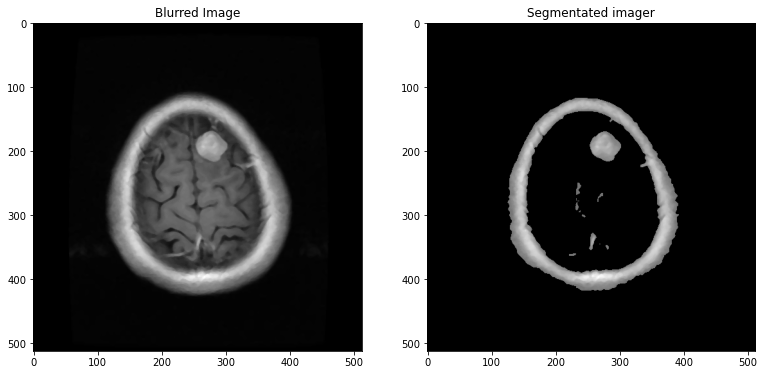

In [123]:
# kernel_size = 5
# image = gilioma_training[0]
# img = cv2.imread(r"D:\project\data\Training\meningioma\Tr-me_0015.jpg", cv2.IMREAD_GRAYSCALE)

# ## median blur
# new_image = cv2.medianBlur(img, kernel_size)
# plt.figure(figsize=(20, 20))
# plt.subplot(231), plt.imshow(new_image, cmap='gray'),plt.title('Blurred Image')

# ## kapur thresholding
# threshold = kapur_threshold(new_image)
# binr = cv2.threshold(new_image, threshold, 255, cv2.THRESH_BINARY)[1]
# plt.subplot(232), plt.imshow(binr, cmap='gray'),plt.title('Segmentated imager')

# ## masking..?n 
# masked1 = cv2.bitwise_and(new_image, new_image, mask=binr)
# plt.subplot(232), plt.imshow(masked1, cmap='gray'),plt.title('Segmentated imager')
# # cv2.imwrite('amasked.jpg', masked1)

# # # adaptive thresholding
# # thresh = cv2.adaptiveThreshold(new_image, 255, 
# #                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
# #                               cv2.THRESH_BINARY, 15, 3)
# # plt.subplot(233), plt.imshow(thresh, cmap='gray'),plt.title('Segmentated imager')

### 1.2 Morpho

(<AxesSubplot:title={'center':'Closing'}>,
 Text(0.5, 1.0, 'Closing'))

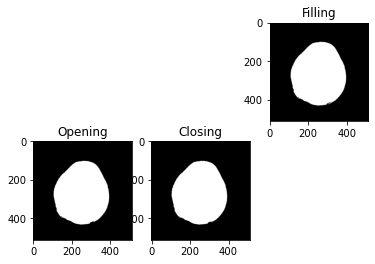

In [110]:
# # binr = cv2.threshold(segmented_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
# # plt.imshow(new_image, cmap='gray')
# # plt.subplot(232), plt.imshow(segmented_image),plt.title('Segmentated imager')

# # define the kernel
# kernel = np.identity(3, np.uint8)
  
    
# ## FILLING
# binr_cp = binr.copy()
 
# # Mask used to flood filling.
# # Notice the size needs to be 2 pixels than the image.
# h, w = binr.shape[:2]
# mask = np.zeros((h+2, w+2), np.uint8)
 
# # Floodfill from point (0, 0)
# cv2.floodFill(binr_cp, mask, (0,0), 255);
 
# # Invert floodfilled image
# binr_cp_inv = cv2.bitwise_not(binr_cp)
 
# # Combine the two images to get the foreground.
# filling = binr | binr_cp_inv
# plt.subplot(233), plt.imshow(filling, cmap='gray'),plt.title('Filling')

# # opening the image
# opening = cv2.morphologyEx(filling, cv2.MORPH_OPEN, kernel, iterations=1)
# plt.subplot(234), plt.imshow(opening, cmap='gray'),plt.title('Opening')
# # closing the image
# closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)
# plt.subplot(235), plt.imshow(closing, cmap='gray'),plt.title('Closing')


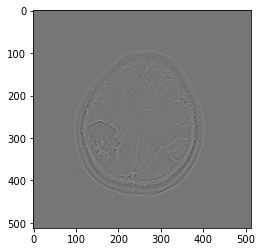

In [103]:
# ## laplacian transformation (for edge)
# laplacian = cv2.Laplacian(new_image,cv2.CV_64F)
# plt.imshow(laplacian, cmap='gray')

In [10]:
# from pythreshold.utils import test_thresholds
# from scipy.misc import ascent

In [161]:
model_path = ...
bs = 32

model = CNN1() 

model.load_weights(model_path, skip_mismatch=False, by_name=False, options=None)

predictions = model.predict(generator = test_generator,
                                steps=test_generator.samples/bs,
                                workers = 0,
                                verbose=1)

predict = model.evaluate(test_generator,verbose = 1)

# # Evaluate predictions
predictedClass = np.argmax(predictions, axis=1)
trueClass = test_generator.classes[test_generator.index_array]
classLabels = list(test_generator.class_indices.keys())

# Create confusion matrix
confusionMatrix = (confusion_matrix(
    y_true=trueClass, # ground truth (correct) target values
    y_pred=predictedClass)) # estimated targets as returned by a classifier
accuracy = accuracy_score(trueClass, predictedClass)

In [292]:
from model import CNN1, CNN2, Finetuning
import numpy as np
from tensorflow.keras.optimizers import Adam

In [299]:
model.summary()

Model: "cnn1_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         multiple                  160       
                                                                 
 conv2d_115 (Conv2D)         multiple                  4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 conv2d_116 (Conv2D)         multiple                  9248      
                                                                 
 conv2d_117 (Conv2D)         multiple                  9248      
                                                                 
 conv2d_118 (Conv2D)         multiple                  18496     
                                                            

In [300]:
model = CNN1()

model_path = "models/CNN1_aug/weights-01-0.26.hdf5"
model.build(input_shape = (32, 512, 512, 1))

In [304]:
load_model(r"models\CNN1_aug\weights-01-0.26.hdf5")

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x000001E1D580D6A0>.

In [301]:
model.load_weights(model_path, skip_mismatch=False, by_name=False, options=None)

ValueError: axes don't match array

In [ ]:
model.build(input_shape = (bs, 512, 512, 1))
model.compile(optimizer= Adam(learning_rate = lr),
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model.load_weights(model_path, skip_mismatch=False, by_name=False, options=None)